In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in all words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
# build the vocabulary  of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [93]:
# build the dataset
block_size = 3 # context length. How many characters do we take to predict the next one?
X, Y = [], []
for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append to the context

X = torch.tensor(X)
Y = torch.tensor(Y)

In [94]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [11]:
C = torch.randn((27, 2)) # initialize the embedding matrix

In [38]:
C[X].shape

torch.Size([32, 3, 2])

In [37]:
C[:2]

tensor([[-0.0130, -1.4785],
        [ 0.7550, -0.1837]])

In [13]:
C[5] # index into row 5

tensor([ 0.5520, -0.5206])

In [17]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C # alternative way to index into 5
# interestingly this could be considered the first layer of our neural net it just lacks a non linearity

tensor([ 0.5520, -0.5206])

In [18]:
C[[5,6,7]] # indexing with a list to get rows 5,6,7

tensor([[ 0.5520, -0.5206],
        [ 0.4830, -0.2616],
        [ 0.8891,  0.3412]])

In [27]:
C[torch.tensor([5,6,7,7,7])] # indexing with a tensor

tensor([[ 0.5520, -0.5206],
        [ 0.4830, -0.2616],
        [ 0.8891,  0.3412],
        [ 0.8891,  0.3412],
        [ 0.8891,  0.3412]])

In [30]:
C[X].shape # retrieve the embedding vector corresponding to the integers in X

torch.Size([32, 3, 2])

In [39]:
X[13]

tensor([0, 0, 1])

In [22]:
X[13, 2]

tensor(1)

In [23]:
C[X][13,2]

tensor([ 0.7550, -0.1837])

In [25]:
emb = C[X] #simultaneously embed all the vectors in X
emb.shape

torch.Size([32, 3, 2])

In [ ]:
W1 = torch.randn((6, 100)) # each input is [3,2] -> 6 when flattened and num neurons is variable and we can pick
b1 = torch.randn(100)

In [45]:
# we need to stack the embedding vectors for each row in the context (3 chars represented in each row) to feed it into the flattened input
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [ ]:
torch.cat(torch.unbind(emb,1),1).shape # note this is not efficient as a new tensor is created!

torch.Size([32, 6])

In [49]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [50]:
a.shape

torch.Size([18])

In [ ]:
a.storage() # underlying elements that are being stored in the tensor a

/tmp/ipykernel_5711/214256462.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [ ]:
a.view(2,9) # total number of elements must equal the elements in .storage() for view to work
# view allows for storage to remain the same, but for the elements to be rearranged in differnt shapes

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [55]:
emb.view(32,6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [ ]:
# h = emb.view(emb.shape[0], 6) @ W1 + b1 # could also use emb.view(-1, 6) and pytorch will derive that the first dim should be 32
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # note that the bias vector is broadcasted and then element wise addition is performed

In [59]:
h

tensor([[-0.9146,  0.9998, -0.9998,  ...,  0.9942,  0.6533,  0.9956],
        [-0.9509,  0.9929, -0.9990,  ...,  0.9951, -0.3268,  0.9214],
        [-0.9980,  0.7437, -0.9996,  ...,  0.9864,  0.9993,  0.9479],
        ...,
        [-0.9815,  0.9809, -0.8898,  ..., -0.8804, -0.9863,  0.9945],
        [-0.9802,  0.9110, -0.8447,  ..., -0.4743,  0.9874,  0.9969],
        [-1.0000, -0.9062, -0.9174,  ..., -0.9608,  0.0319,  0.4089]])

In [60]:
h.shape

torch.Size([32, 100])

In [61]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [62]:
logits = h @ W2 + b2

In [63]:
logits.shape

torch.Size([32, 27])

In [64]:
counts = logits.exp()

In [74]:
prob = counts / counts.sum(1, keepdims=True)

In [66]:
prob.shape

torch.Size([32, 27])

In [76]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(19.0513)

In [72]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [77]:
### full loop

X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [131]:
SEED = 2147483647
g = torch.Generator().manual_seed(SEED)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [132]:
sum(p.nelement() for p in parameters) # total parameters

3481

In [133]:
for p in parameters:
    p.requires_grad = True

In [134]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [137]:
# lri = []
# lossi = []

for i in range(10000):
    # minibatch construct
    # a mini-batch effectively gives us an estimate of the gradient direction
    # given a fixed compute budget we can weigh the tradeoff of how precise our gradient is with the number of steps we want to take
    # mini batches allow us to approximate the gradient and take more steps
    ix = torch.randint(0, X.shape[0], (32,))

    # forward pass
    emb = C[X[ix]] # (32, 3, 2) -> fetching a mini-batch of X (32 rows) and then getting the corresponding embedding vectors
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Y[ix]) # this is equivalent to the above three lines (it is more efficient and stable for training)
    # note the forward pass is evaluating the loss only for the mini batch
    # print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    # lr = lrs[i]
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
    
    # # track stats
    # lri.append(lre[i])
    # lossi.append(loss.item())
    
print(loss.item())

2.2715182304382324


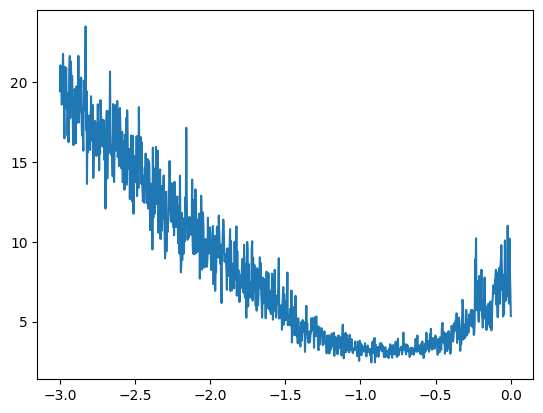

In [130]:
plt.plot(lri, lossi)

In [ ]:
# evaluation block
emb = C[X] # (32, 3, 2) -> fetching a mini-batch of X (32 rows) and then getting the corresponding embedding vectors
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y) # this is equivalent to the above three lines (it is more efficient and stable for training)
loss

tensor(2.6005, grad_fn=<NllLossBackward0>)

In [ ]:
# lets split the dataset properly and try another training run
# training, validation and test split
# 80, 10, 10%

In [139]:
def build_dataset(words):
    # build the dataset
    block_size = 3 # context length. How many characters do we take to predict the next one?
    X, Y = [], []
    for w in words:
        # print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix] # crop and append to the context

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

print(len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xval, Yval = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

32033
torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [162]:
SEED = 2147483647
g = torch.Generator().manual_seed(SEED)
C = torch.randn((27,10), generator=g)
W1 = torch.randn((30,200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [163]:
sum(p.nelement() for p in parameters) # total parameters

11897

In [164]:
for p in parameters:
    p.requires_grad = True

In [165]:
lossi = []
stepi = []

In [169]:
for i in range(50000):
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix]) 

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad
    
    # # track stats
    stepi.append(i)
    lossi.append(loss.log10().item())
    
print(loss.item())

2.014051675796509


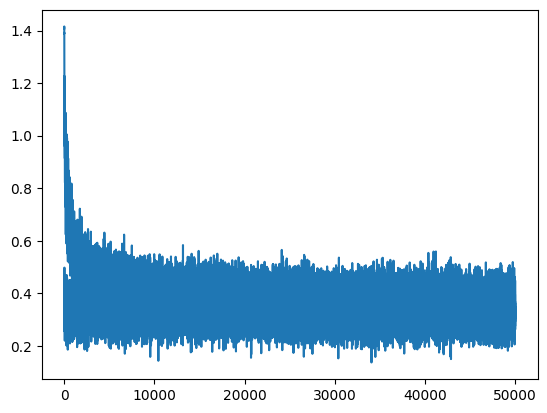

In [170]:
plt.plot(stepi, lossi)

In [171]:
# evaluation block
emb = C[Xval] # (32, 3, 2) 
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yval)
loss

tensor(2.1910, grad_fn=<NllLossBackward0>)

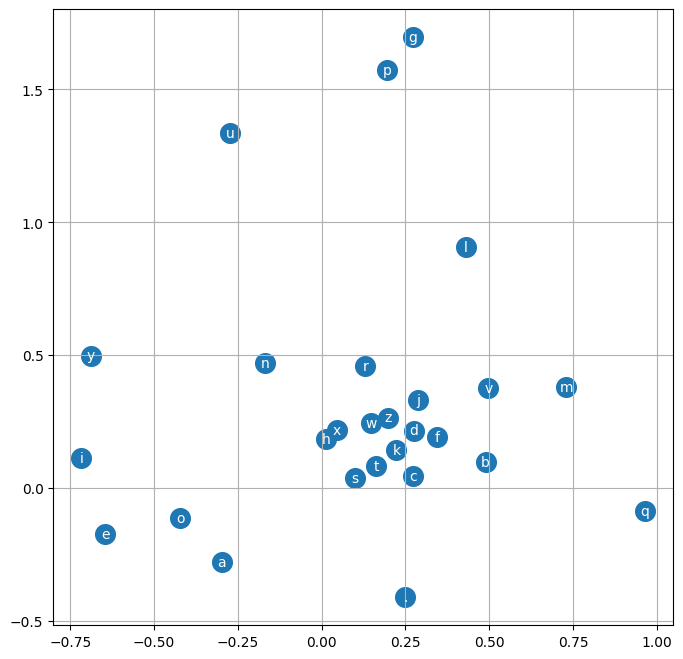

In [ ]:
# plot the context vectors representing the words (only works for context vector of size 2)
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color="white")
plt.grid("minor")